<center><h1>web-scraping-udemy</h1> </center>

<center><h3> Disha Patel</h3> </center>

# Objective 
In the wake of the post-COVID job market shift towards tech fields, this project delves into the heart of online learning. Analyzing over 1100 courses in Data Science and Network & Security on Udemy, it offers insights for everyone involved. These fields represent two major pillars of the tech industry, experiencing surges in demand for skilled professionals. By exploring courses in these areas, this project addresses the growing interest and career opportunities in data-driven roles and network security.

# Table of Contents

1. [Import Selenium & Required Libraries](#1.-Import-Selenium-&-Required-Libraries)
2. [Data Scraping](#2.-Data-Scraping)
3. [Data Cleanup](#3.-Data-Cleanup)
4. [Analysis-and-Visualization](#4.-Analysis-and-Visualization)
5. [5. Combined DataFrame Analysis](#5.-Combined-DataFrame-Analysis)

# 1. Import Selenium & Required Libraries

### 1.1 Import relevent libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import re
import random


### 1.2 Import and setup BeautifulSoup and selenium

In [1]:
from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import json # For parsing json

## importing selenium library

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

## setting up the browser driver and library

path = '/Users/Disha/Desktop/chromedriver_mac64/chromedriver'

s = Service(path)
driver = webdriver.Chrome(service=s)


# 2. Data Scraping

### 2.1 Create Dictionary to Store Values

create two different dictionaries to add the value from the web page and looping over each catergory at a time

 1 (data science dict) = data_sci{}
 
 2 (network and Security dict) = net_security {}


### 2.2 Scraping Data

#### Scraping Data Science courses details

In [2]:
## Creating Dictionary for Data Science which is a subcategory of web development on udemy
data_sci = {
    'title': [],
    'tutor': [],
    'rating': [],
    'num_reviews': [],
    'hours': [],
    'num_lecture': [],
    'level': []
}

Scraping and looping Process:

As the udemy pages loads dynamically Selenium would be better choice to interact with the pages and we can use BeautifulSoup to parse the html content

Each page has 8 elements which we can extract:
 Course Title
 tutor
 rating
 reviews numbers
 hours
 number of lectures
 level and
 price (actual and discounted) 

NOTE:- (Even with selenium or BeautifulSoup the page was not able to load the price, it only allows API to collect price information)

In [3]:
## Opening a brower page for each page to collect the data while avoiding the blockage of scraping 

## Creating a for loop for iterate over pages and all information to collect on that page

for page in range(1,76):
    
    ## setting up the driver to go to the website page
    driver = webdriver.Chrome(service=s)
    url = f'https://www.udemy.com/courses/development/data-science/?p={page}'
    
    ## adding sleep which adds delay in scraping to avoid server overload
    driver.get(url)
    sleep(3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)
    
    ## using BeautifulSoup to parse the html
    soup = BeautifulSoup(driver.page_source,'html.parser')
    
    ## Creating loop to iterate over the elements to collect the data and appending to the dict accoring to relevent column based on the tag
    for detail in soup.find_all('div',class_='course-card--main-content--2XqiY course-card--has-price-text--1c0ze'):
        
        # Data science Course Title as title
        try:
            data_sci['title'].append(detail.find('a').contents[0].text)
        except:
            data_sci['title'].append('Not Available')
        
        # Tutor
        try:
            data_sci['tutor'].append(detail.find('div',class_='course-card--instructor-list--nH1OC').get_text())
        except:
            data_sci['tutor'].append('Not Available')
         
        # cousre rating
        try:
            data_sci['rating'].append(detail.find('span',{'data-purpose':'seo-rating'}).text)
        except:
            data_sci['rating'].append('Not Available')
        
        # No. of reviews
        try:
            data_sci['num_reviews'].append(detail.find('span',{'data-purpose':'seo-num-reviews'}).text)
        except:
            data_sci['num_reviews'].append('Not Available')
        
        # No. of hours of the course
        try:
            data_sci['hours'].append(detail.find('span',{'data-purpose':'seo-content-info'}).text)
        except:
            data_sci['hours'].append('Not Available')
         
        # No. of lectures
        try:
            data_sci['num_lecture'].append(detail.find('span',{'data-purpose':'seo-num-lectures'}).text)
        except:
            data_sci['num_lecture'].append('Not Available')
        
        # Level of the course
        try:
            data_sci['level'].append(detail.find('span',{'data-purpose':'seo-instructional-level'}).text)
        except:
            data_sci['level'].append('Not Available')
            
    ## quit() to close the page and to start fresh for the next page with new browser page
    driver.quit()

In [ ]:
# test: check dictionary
data_sci
#Output Example (Output was too long to display on this github repo)
# {'title': ['Machine Learning A-Z™: Python & R in Data Science [2023]',
#   'Python for Data Science and Machine Learning Bootcamp',
#   'The Data Science Course 2023: Complete Data Science Bootcamp',
#   'R Programming A-Z™: R For Data Science With Real Exercises!',
#   'Deep Learning A-Z™: Hands-On Artificial Neural Networks',
#   'Statistics for Data Science and Business Analysis',
#   'Data Science A-Z™: Real-Life Data Science Exercises Included',
#   'Machine Learning, Data Science and Deep Learning with Python',
#   'Python A-Z™: Python For Data Science With Real Exercises!',
#   'Artificial Intelligence A-Z™: Learn How To Build An AI',
#   'Spark and Python for Big Data with PySpark',
#   'Data Analysis with Pandas and Python',

In [5]:
# check data frame using pandas dict to DataFrame function
data_science_df = pd.DataFrame.from_dict(data_sci)

In [6]:
# checking the count of rows and columns of the DataFrame
data_science_df.shape

(1236, 7)

In [8]:
# csv geneterated without header
data_science_df.to_csv('data_science.csv',index=False,mode='a',header=False)

In [7]:
# csv geneterated with header
data_science_df.to_csv('data75_science2_.csv',index=False,mode='a')

#### 2.3 Scraping Network and Security courses details

In [9]:
## Creating Dictionary for Network and Security which is a subcategory of IT and Software on udemy
net_security = {
    'title': [],
    'tutor': [],
    'rating': [],
    'num_reviews': [],
    'hours': [],
    'num_lecture': [],
    'level': []
}

In [10]:
## Opening a brower page for each page to collect the data while avoiding the blockage of scraping 

## Creating a for loop for iterate over pages and all information to collect on that page

for page in range(1,76):
    
    ## setting up the driver to go to the website page
    driver = webdriver.Chrome(service=s)
    url = f'https://www.udemy.com/courses/it-and-software/network-and-security/?p={page}'
    
    ## adding sleep which adds delay in scraping to avoid server overload
    driver.get(url)
    sleep(3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)

    ## using BeautifulSoup to parse the html
    soup = BeautifulSoup(driver.page_source,'html.parser')
    
    ## Creating loop to iterate over the elements to collect the data and appending to the dict accoring to relevent column based on the tag
    for detail in soup.find_all('div',class_='course-card--main-content--2XqiY course-card--has-price-text--1c0ze'):
        
        # Network and Security Course Title as title
        try:
            net_security['title'].append(detail.find('a').contents[0].text)
        except:
            net_security['title'].append('Not Available')
        
        # Tutor
        try:
            net_security['tutor'].append(detail.find('div',class_='course-card--instructor-list--nH1OC').get_text())
        except:
            net_security['tutor'].append('Not Available')
         
        # Rating
        try:
            net_security['rating'].append(detail.find('span',{'data-purpose':'seo-rating'}).text)
        except:
            net_security['rating'].append('Not Available')
        
        # No.of reviews
        try:
            net_security['num_reviews'].append(detail.find('span',{'data-purpose':'seo-num-reviews'}).text)
        except:
            net_security['num_reviews'].append('Not Available')
        
        # No.of Hours
        try:
            net_security['hours'].append(detail.find('span',{'data-purpose':'seo-content-info'}).text)
        except:
            net_security['hours'].append('Not Available')
        
        # No.of lectures
        try:
            net_security['num_lecture'].append(detail.find('span',{'data-purpose':'seo-num-lectures'}).text)
        except:
            net_security['num_lecture'].append('Not Available')
         
        # Level
        try:
            net_security['level'].append(detail.find('span',{'data-purpose':'seo-instructional-level'}).text)
        except:
            net_security['level'].append('Not Available')
    
    
    ## quit() to close the page and to start fresh for the next page with new browser page
    driver.quit()

In [ ]:
# test: check dictionary
net_security
#Output Example (Output was too long to display on this github repo)
# {'title': ['Learn Ethical Hacking From Scratch',
#   'Kubernetes for the Absolute Beginners - Hands-on',
#   'The Complete Cyber Security Course : Hackers Exposed!',
#   'The Absolute Beginners Guide to Cyber Security 2023 - Part 1',
#   'The Complete Ethical Hacking Course: Beginner to Advanced!',
#   'TOTAL: CompTIA Network+ Certification (N10-007)',
#   'AWS Essentials',
#   'Website Hacking / Penetration Testing',
#   'HashiCorp Certified: Terraform Associate 2023',
#   'OWASP top 10 Web Application Security for Absolute Beginners',
#   'The Beginners 2023 Cyber Security Awareness Training Course',
#   'The Complete Cyber Security Course : Network Security!',
#   'CISSP Certification: CISSP Domain 1 & 2 Boot Camp UPDATED 23',

In [12]:
# check data frame using pandas dict to DataFrame function
network_security_df = pd.DataFrame.from_dict(net_security)

In [13]:
# Checking the rows and columns of the dataframe
network_security_df.shape

(1248, 7)

In [15]:
# Converting the DataFrame to csv without header
network_security_df.to_csv('network_security.csv',index=False,mode='a',header=False)

In [14]:
# Converting the DataFrame to csv with header
network_security_df.to_csv('network75_security_2.csv',index=False,mode='a')

#### 2.4 Reading csv Into Pandas DataFrame

In [5]:
## ds = data-science , ns = network-security
ds = pd.read_csv('data75_science_2.csv')
ns = pd.read_csv('network75_security_2.csv')

In [6]:
## it sets to display all rows and columns (our df is around 1200 , avoid if its too big)
#pd.set_option('display.max_rows', None)
## Data Science (ds) csv
ds.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Machine Learning A-Z™: Python & R in Data Scie...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",Rating: 4.5 out of 5,166174 reviews,42.5 total hours,382 lectures,All Levels
1,Python for Data Science and Machine Learning B...,Jose Portilla,Rating: 4.6 out of 5,127021 reviews,25 total hours,165 lectures,All Levels
2,The Data Science Course 2023: Complete Data Sc...,"365 Careers, 365 Careers Team",Rating: 4.6 out of 5,119577 reviews,32 total hours,517 lectures,All Levels
3,R Programming A-Z™: R For Data Science With Re...,"Kirill Eremenko, Ligency I Team, Ligency Team",Rating: 4.6 out of 5,49421 reviews,10.5 total hours,78 lectures,All Levels
4,Deep Learning A-Z™: Hands-On Artificial Neural...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",Rating: 4.6 out of 5,42116 reviews,22.5 total hours,169 lectures,All Levels


In [7]:
## Network and Security (ns) csv
ns.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Learn Ethical Hacking From Scratch,"Zaid Sabih, z Security",Rating: 4.6 out of 5,112384 reviews,16 total hours,145 lectures,All Levels
1,Kubernetes for the Absolute Beginners - Hands-on,"Mumshad Mannambeth, KodeKloud Training",Rating: 4.6 out of 5,62456 reviews,6 total hours,61 lectures,Beginner
2,The Complete Cyber Security Course : Hackers E...,Nathan House,Rating: 4.5 out of 5,46726 reviews,12 total hours,124 lectures,All Levels
3,The Absolute Beginners Guide to Cyber Security...,Alexander Oni,Rating: 4.6 out of 5,32677 reviews,4.5 total hours,57 lectures,Beginner
4,The Complete Ethical Hacking Course: Beginner ...,"Ermin Kreponic, Aldin Omerdic",Rating: 4.3 out of 5,29204 reviews,25 total hours,113 lectures,All Levels


In [8]:
print(ds.info())
print(ns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1236 non-null   object
 1   tutor        1236 non-null   object
 2   rating       1236 non-null   object
 3   num_reviews  1236 non-null   object
 4   hours        1236 non-null   object
 5   num_lecture  1236 non-null   object
 6   level        1236 non-null   object
dtypes: object(7)
memory usage: 67.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1248 non-null   object
 1   tutor        1248 non-null   object
 2   rating       1248 non-null   object
 3   num_reviews  1248 non-null   object
 4   hours        1248 non-null   object
 5   num_lecture  1248 non-null   object
 6   level        1248 non-null   object
dtyp

# 3. Data Cleanup

-- Dealing with one dataframe at a time (data_science and network_security)
 - title = string
 - tutor = string
 - rating = float
 - num_reviews = int
 - hours = float
 - num_lecture = int
 - level = category

### 3.1 Data Science Data

In [9]:
## coping the original data to avoid any manipulation in the original df
ds_course_1 = ds.copy()

##### a. Checking the dataframe for columns with values - 'Not Available'

In [10]:
# find_not_available
## creating a def function to give us the rows and columns which have 'Not Available' as values

def find_not_available(df,*columns):

    # create a boolean mask for all rows where at least one of the specified columns has value 'Not Available'
    contains_not_available = df.applymap(lambda x: 'Not Available' in str(x)).any(axis=1)
    # return the subset of the dataframe where the mask is True
    return df[contains_not_available]

In [11]:
find_not_available(ds_course_1)

,title,tutor,rating,num_reviews,hours,num_lecture,level
865,ATAD Tableau Desktop Certified Associate Pract...,Venkatesh Chandra,Rating: 3.4 out of 5,43 reviews,175 questions,Not Available,Intermediate
970,Microsoft Power BI Practice Tests and Intervie...,Prince Patni,Rating: 4.4 out of 5,34 reviews,90 questions,Not Available,All Levels
1014,101 - F5 CERTIFICATION EXAM,SYRC PRO,Rating: 4.5 out of 5,29 reviews,240 questions,Not Available,Intermediate
1078,Certified Data Scientist - Practice Tests - 2023,Paweł Krakowiak,Rating: 4.2 out of 5,24 reviews,205 questions,Not Available,Beginner
1164,Machine Learning Practice Tests and Interview ...,Prince Patni,Rating: 4.1 out of 5,18 reviews,100 questions,Not Available,All Levels


Dropping the rows as the num_lecture value which are not available is actually a question bank
its safe to drop those rows as even if we convert the 'Not Available' to nan while converting it to int.
The values in hours would be misinterpret as they have 'Questions' instead of hours beside the float value.


In [12]:
# assigning the indexof the rows with 'Not Available' values to variable drop_rows so we can drop them later on
drop_rows = find_not_available(ds_course_1).index
drop_rows

Int64Index([865, 970, 1014, 1078, 1164], dtype='int64')

In [13]:
## Using .drop() and setting the index to drop to the variable rows_to_drop 
ds_course_1.drop(index=drop_rows, inplace=True)

In [14]:
# checking the shape of the dataframe to see if drooped the values
ds_course_1.shape

(1231, 7)

### 3.1.a Converting the Rating column 'str' to 'float' type

Removing the string from the rating column to extract only the float values

In [15]:
## passing the df in def function as we are working with 2 dataframes and to avoid writing same function twice

def clean_rating(column):
    # Using try-except block to handle exceptions when extracting numeric values
    try:
        # Extracting numeric values using regex and converting them to floats
        extracted = column.str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
    except:
        # For values in the column which have 'Not Available'
        extracted = np.nan
    return extracted

In [16]:
## passing the def funtion to clean the rating column
ds_course_1['rating'] = clean_rating(ds_course_1['rating'])

In [17]:
ds_course_1.head(10)

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Machine Learning A-Z™: Python & R in Data Scie...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.5,166174 reviews,42.5 total hours,382 lectures,All Levels
1,Python for Data Science and Machine Learning B...,Jose Portilla,4.6,127021 reviews,25 total hours,165 lectures,All Levels
2,The Data Science Course 2023: Complete Data Sc...,"365 Careers, 365 Careers Team",4.6,119577 reviews,32 total hours,517 lectures,All Levels
3,R Programming A-Z™: R For Data Science With Re...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,49421 reviews,10.5 total hours,78 lectures,All Levels
4,Deep Learning A-Z™: Hands-On Artificial Neural...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.6,42116 reviews,22.5 total hours,169 lectures,All Levels
5,Statistics for Data Science and Business Analysis,"365 Careers, 365 Careers Team",4.6,36128 reviews,5 total hours,92 lectures,All Levels
6,Data Science A-Z™: Real-Life Data Science Exer...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.5,32850 reviews,21 total hours,216 lectures,All Levels
7,"Machine Learning, Data Science and Deep Learni...","Sundog Education by Frank Kane, Frank Kane, Su...",4.6,28514 reviews,15.5 total hours,116 lectures,Beginner
8,Python A-Z™: Python For Data Science With Real...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,25610 reviews,11 total hours,71 lectures,All Levels
9,Artificial Intelligence A-Z™: Learn How To Bui...,"Hadelin de Ponteves, Kirill Eremenko, Ligency ...",4.4,22560 reviews,17 total hours,125 lectures,All Levels


#### Alternate method to extract the float number and change the datatype

rating = ds_course_1['rating'].apply(lambda x: x.split(':')[1].split()[0] if isinstance(x, str) else x).astype(float)

(rating == ds_course_1['cleaned_rating']).sum()

### 3.1.b Converting the Review column 'str' to 'int' type

Removing the string from the num_reviews column to extract only the int values

In [18]:
## Creating a def function to remove 'reviews' str from the value and extract the int values only

def cleaned_reviews(df, *column):
    
    for col in column:
        if 'Not Available' in df[col].values:
            df[col] = df[col].str.replace('Not Available',np.nan)
        else:
            df[col] = df[col].str.replace(r'\D','',regex=True).astype(int)

In [19]:
cleaned_reviews(ds_course_1, 'num_reviews')

### 3.1.c Converting the Hours column 'str' to 'float' type

In [21]:
ds_course_2 = ds_course_1.copy()

In [22]:
## removing string from hours and convert it to float type:
## we can use same df as for rating as def func remove string and extracts only the float values 

def extract_hours(df, column):
    
    # Using regex to extract the numeric values from the column
    extracted = df[column].str.extract('(\d+\.?\d*)', expand=False)
    # Convert the extracted values to floats
    extracted = pd.to_numeric(extracted, errors='coerce')
    # Overwrite the original column with the extracted values
    df[column] = extracted

In [23]:
extract_hours(ds_course_2,'hours')

### 3.1.d Converting the Lectures column 'str' to 'int' type

In [26]:
## function to convert value x to a int type
def extract_int(x):
    
    if x == 'Not Available':
        return 0
    else:
        return int(x.split()[0])

In [27]:
ds_course_2['num_lecture'] = ds_course_2['num_lecture'].apply(extract_int)

In [28]:
ds_course_2.head(10)

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Machine Learning A-Z™: Python & R in Data Scie...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.5,166174,42.5,382,All Levels
1,Python for Data Science and Machine Learning B...,Jose Portilla,4.6,127021,25.0,165,All Levels
2,The Data Science Course 2023: Complete Data Sc...,"365 Careers, 365 Careers Team",4.6,119577,32.0,517,All Levels
3,R Programming A-Z™: R For Data Science With Re...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,49421,10.5,78,All Levels
4,Deep Learning A-Z™: Hands-On Artificial Neural...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.6,42116,22.5,169,All Levels
5,Statistics for Data Science and Business Analysis,"365 Careers, 365 Careers Team",4.6,36128,5.0,92,All Levels
6,Data Science A-Z™: Real-Life Data Science Exer...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.5,32850,21.0,216,All Levels
7,"Machine Learning, Data Science and Deep Learni...","Sundog Education by Frank Kane, Frank Kane, Su...",4.6,28514,15.5,116,Beginner
8,Python A-Z™: Python For Data Science With Real...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,25610,11.0,71,All Levels
9,Artificial Intelligence A-Z™: Learn How To Bui...,"Hadelin de Ponteves, Kirill Eremenko, Ligency ...",4.4,22560,17.0,125,All Levels


##### Dealing with duplicates

In [33]:
def remove_duplicates(df):
    
    df = df.drop_duplicates(ignore_index=True)
    return df

In [34]:
ds_duplicates = ds_course_2[ds_course_2.duplicated()]
print(len(ds_duplicates))
print(ds_duplicates.index)

38
Int64Index([ 192,  193,  194,  195,  197,  342,  343,  344,  345,  346,  347,
             412,  413,  414,  415,  416,  417,  514,  515,  516,  517,  518,
             519,  696,  697,  698,  699,  700,  701,  942,  997, 1055, 1086,
            1087, 1088, 1089, 1090, 1091],
           dtype='int64')


In [40]:
## while collecting the data we scraped few noise data as well (unwnated data which was shown in ads)

In [35]:
## removing the duplicates and saving the df as new name
ds_course_3 = remove_duplicates(ds_course_2)

In [36]:
ds_course_3.shape

(1193, 7)

In [37]:
ds_course_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1193 non-null   object 
 1   tutor        1193 non-null   object 
 2   rating       1193 non-null   float64
 3   num_reviews  1193 non-null   int64  
 4   hours        1193 non-null   float64
 5   num_lecture  1193 non-null   int64  
 6   level        1193 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 65.4+ KB


In [61]:
ds_course_3.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Machine Learning A-Z™: Python & R in Data Scie...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.5,166174,42.5,382,All Levels
1,Python for Data Science and Machine Learning B...,Jose Portilla,4.6,127021,25.0,165,All Levels
2,The Data Science Course 2023: Complete Data Sc...,"365 Careers, 365 Careers Team",4.6,119577,32.0,517,All Levels
3,R Programming A-Z™: R For Data Science With Re...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,49421,10.5,78,All Levels
4,Deep Learning A-Z™: Hands-On Artificial Neural...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.6,42116,22.5,169,All Levels


In [38]:
ds_course_3.to_csv('data_sci_cleaned.csv',index=False)

### 3.2 Network and security Data

In [39]:
## coping the original data to avoid any manipulation in the original df
ns_course_1 = ns.copy()

##### Checking the dataframe for columns with values - 'Not Available'

In [41]:
# Using the created 
find_not_available(ns_course_1)

,title,tutor,rating,num_reviews,hours,num_lecture,level
400,[NEW]JNCIA-Junos JN0-104 Practice Exams,S2 Academy,Rating: 4.5 out of 5,441 reviews,300 questions,Not Available,Beginner
610,TOTAL: CISM (Info. Security Mgr) Practice Test...,Total Seminars • Over 1 Million Enrollments,Rating: 4.4 out of 5,235 reviews,400 questions,Not Available,All Levels
674,Cyber Security Awareness Program Quiz Test,Byte Capsule Ltd.,Rating: 4.6 out of 5,205 reviews,27 questions,Not Available,Beginner
676,EC-Council Certified Encryption Specialist Pra...,Viktor Afimov,Rating: 4.9 out of 5,204 reviews,200 questions,Not Available,Beginner
691,CyberSecurity - Practice Paper-2021 Updated*,"Prithveesh K, Prithvi Cyber Protect",Rating: 4.2 out of 5,197 reviews,70 questions,Not Available,All Levels
766,Network Operations Center Engineer Mock Test,AKASH RANJAN PATEL,Rating: 2.6 out of 5,166 reviews,76 questions,Not Available,All Levels
768,PCI DSS Internal Security Assessor (ISA) Pract...,Dennis Steenbergen,Rating: 4.0 out of 5,165 reviews,95 questions,Not Available,Intermediate
817,NEW 2023 CompTIA Security+ (SY0-601) Practice ...,"Nick Gorgotsias, ExamsDigest • 230,000+ Enroll...",Rating: 4.6 out of 5,148 reviews,260 questions,Not Available,All Levels
888,Ethical Hacking,Manish Patidar,Rating: 4.0 out of 5,129 reviews,45 questions,Not Available,All Levels
905,ISO/IEC 27001:2022 - Information Security Lea...,"Exoexcellence Training Resources, S.M. WAQAS IMAM",Rating: 3.8 out of 5,125 reviews,74 questions,Not Available,All Levels


In [44]:
# assigning the index of the rows with 'Not Available' values to variable rows_to_drop so we can drop them later on
rows_to_drop = find_not_available(ns_course_1).index
rows_to_drop

Int64Index([ 400,  610,  674,  676,  691,  766,  768,  817,  888,  905,  908,
             921,  943,  945, 1134, 1185, 1216],
           dtype='int64')

In [53]:
# Using .drop() and setting the index to drop to the variable rows_to_drop 
ns_course_1.drop(index=rows_to_drop, inplace=True)

In [54]:
ns_course_1.shape

(1231, 7)

### 3.2.a Converting the Rating column 'str' to 'float' type

##### Using the def function we created for rating from above ( data science df ) 

In [42]:
## passing the def funtion to clean the rating column
ns_course_1['rating'] = clean_rating(ns_course_1['rating'])

In [43]:
ns_course_1.head(10)

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Learn Ethical Hacking From Scratch,"Zaid Sabih, z Security",4.6,112384 reviews,16 total hours,145 lectures,All Levels
1,Kubernetes for the Absolute Beginners - Hands-on,"Mumshad Mannambeth, KodeKloud Training",4.6,62456 reviews,6 total hours,61 lectures,Beginner
2,The Complete Cyber Security Course : Hackers E...,Nathan House,4.5,46726 reviews,12 total hours,124 lectures,All Levels
3,The Absolute Beginners Guide to Cyber Security...,Alexander Oni,4.6,32677 reviews,4.5 total hours,57 lectures,Beginner
4,The Complete Ethical Hacking Course: Beginner ...,"Ermin Kreponic, Aldin Omerdic",4.3,29204 reviews,25 total hours,113 lectures,All Levels
5,TOTAL: CompTIA Network+ Certification (N10-007),"Total Seminars • Over 1 Million Enrollments, M...",4.6,28564 reviews,23 total hours,172 lectures,All Levels
6,AWS Essentials,Amazon Web Services (AWS),4.3,25196 reviews,3.5 total hours,61 lectures,Beginner
7,Website Hacking / Penetration Testing,"Zaid Sabih, z Security",4.5,16865 reviews,10.5 total hours,100 lectures,All Levels
8,HashiCorp Certified: Terraform Associate 2023,Zeal Vora,4.7,16056 reviews,12 total hours,115 lectures,Beginner
9,OWASP top 10 Web Application Security for Abso...,Soerin Bipat,4.3,16006 reviews,1.5 total hours,26 lectures,All Levels


### 3.2.b Converting the Review column 'str' to 'int' type

In [45]:
## Using the created func for cleaning up the review column 
cleaned_reviews(ns_course_1, 'num_reviews')

### 3.2.c Converting the Hours column 'str' to 'float' type

In [48]:
## Extracting the float value from the hours column and converting the 'Not Available' 
extract_hours(ns_course_1,'hours')

### 3.2.d Converting the Lectures column 'str' to 'int' type

In [50]:
## converting the 'num_lecture' column to int type and extracting the int values using the def function in 
ns_course_1['num_lecture'] = ns_course_1['num_lecture'].apply(extract_int)

##### Dealing with duplicates

In [55]:
ns_duplicates = ns_course_1[ns_course_1.duplicated()]
print(len(ns_duplicates))
print(ns_duplicates.index)

47
Int64Index([ 144,  145,  147,  149,  211,  278,  279,  280,  281,  282,  283,
             860,  861,  862,  863,  864,  865,  962,  963,  964,  965,  966,
             967,  984,  985,  986,  987,  988,  989, 1006, 1007, 1008, 1009,
            1010, 1011, 1140, 1141, 1142, 1143, 1144, 1145, 1194, 1195, 1196,
            1197, 1198, 1199],
           dtype='int64')


In [56]:
ns_course_2 = remove_duplicates(ns_course_1)

In [57]:
ns_course_2.shape

(1184, 7)

In [58]:
ns_course_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1184 non-null   object 
 1   tutor        1184 non-null   object 
 2   rating       1184 non-null   float64
 3   num_reviews  1184 non-null   int64  
 4   hours        1184 non-null   float64
 5   num_lecture  1184 non-null   int64  
 6   level        1184 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 64.9+ KB


In [60]:
ns_course_2.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Learn Ethical Hacking From Scratch,"Zaid Sabih, z Security",4.6,112384,16.0,145,All Levels
1,Kubernetes for the Absolute Beginners - Hands-on,"Mumshad Mannambeth, KodeKloud Training",4.6,62456,6.0,61,Beginner
2,The Complete Cyber Security Course : Hackers E...,Nathan House,4.5,46726,12.0,124,All Levels
3,The Absolute Beginners Guide to Cyber Security...,Alexander Oni,4.6,32677,4.5,57,Beginner
4,The Complete Ethical Hacking Course: Beginner ...,"Ermin Kreponic, Aldin Omerdic",4.3,29204,25.0,113,All Levels


In [59]:
ns_course_2.to_csv('net_security_cleaned.csv',index=False)

# 4. Analysis and Visualization

### 4.1 Data Science Analysis

In [83]:
## color palette for plots and charts 
my_palette = ['#663398','#9370DB','#BA55D3','#FF69B4','#FFB6C1']

In [4]:
data_science = pd.read_csv('data_sci_cleaned.csv')

In [67]:
data_science.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Machine Learning A-Z™: Python & R in Data Scie...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.5,166174,42.5,382,All Levels
1,Python for Data Science and Machine Learning B...,Jose Portilla,4.6,127021,25.0,165,All Levels
2,The Data Science Course 2023: Complete Data Sc...,"365 Careers, 365 Careers Team",4.6,119577,32.0,517,All Levels
3,R Programming A-Z™: R For Data Science With Re...,"Kirill Eremenko, Ligency I Team, Ligency Team",4.6,49421,10.5,78,All Levels
4,Deep Learning A-Z™: Hands-On Artificial Neural...,"Kirill Eremenko, Hadelin de Ponteves, Ligency ...",4.6,42116,22.5,169,All Levels


##### 4.1.1 Distribution of course ratings: pandas to calculate the mean and median rating and create a histogram of the course ratings

In [5]:
ds_mean_rating = round(data_science['rating'].mean(),2)
ds_median_rating = round(data_science['rating'].median(),2)
print(ds_mean_rating)
print(ds_median_rating)

4.2
4.3


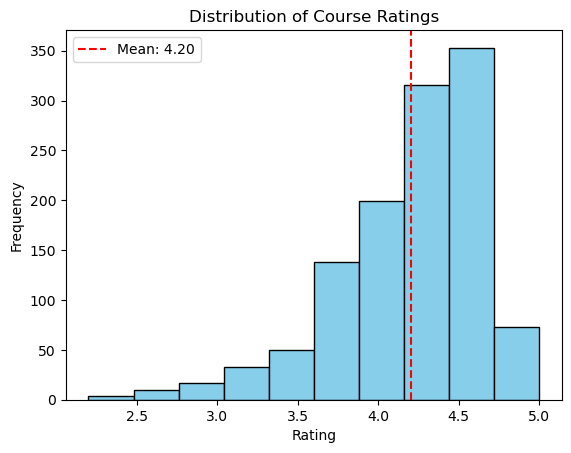

In [7]:
plt.hist(data_science['rating'], bins=10, color="skyblue", edgecolor="black")
plt.axvline(ds_mean_rating, color="red", linestyle="--", label=f"Mean: {ds_mean_rating:.2f}")
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

##### 4.1.2 Correlation between course rating and number of reviews: pandas to calculate the correlation between the course rating and the number of reviews, and if strong corr. scatter plot to visualize the relationship.

In [71]:
ds_rating_review_corr = round(data_science['rating'].corr(data_science['num_reviews']),2)
ds_rating_review_corr

0.1

0.1 shows very weak correlation so using scatter plot to Visualize the corr. won't make a difference

##### 4.1.3 Distribution of course levels: pandas to count the number of courses at each level and create a bar chart to visualize the distribution.

In [12]:
ds_level_counts = data_science.groupby('level')['title'].count()
ds_level_counts

level
All Levels      662
Beginner        350
Expert           27
Intermediate    154
Name: title, dtype: int64

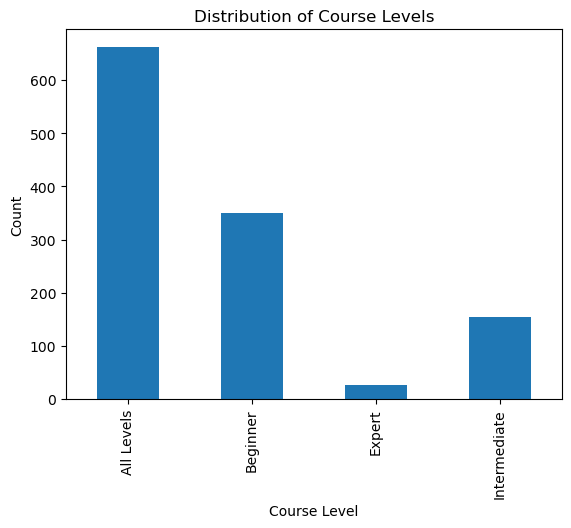

In [10]:
data_science.groupby('level')['title'].count().plot.bar()
plt.xlabel('Course Level')
plt.ylabel('Count')
plt.title('Distribution of Course Levels')
plt.show()

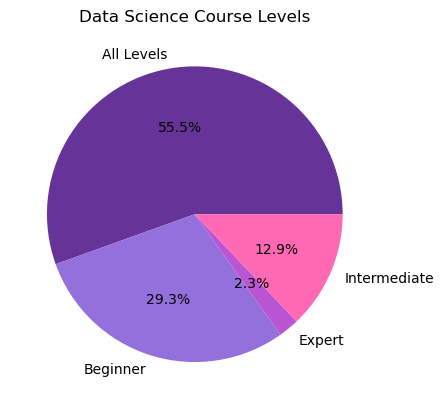

In [85]:
plt.pie(ds_level_counts, labels=ds_level_counts.index,autopct='%1.1f%%',colors=my_palette)
plt.title('Data Science Course Levels')

plt.show()

##### 4.1.4 Average lecture hours by course level: pandas to group the courses by level and calculate the mean lecture hours for each level, and create a bar chart to visualize the differences.

In [91]:
ds_level_lecture_hours = round(data_science.groupby('level')['hours'].mean(),2)
ds_level_lecture_hours

level
All Levels      12.19
Beginner         7.24
Expert           8.80
Intermediate     6.55
Name: hours, dtype: float64

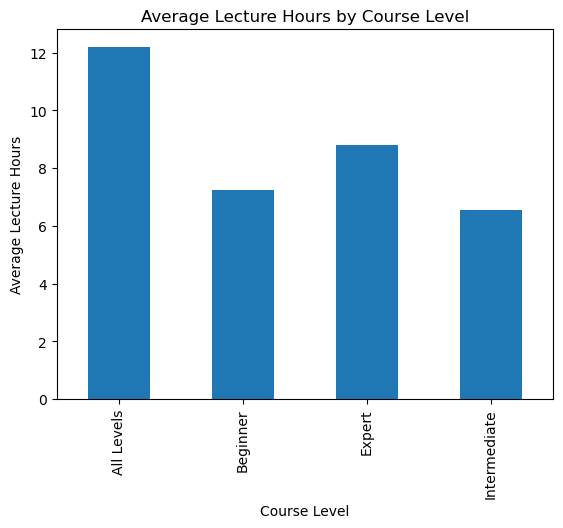

In [100]:
ds_level_lecture_hours.plot(kind='bar')
plt.xlabel('Course Level')
plt.ylabel('Average Lecture Hours')
plt.title('Average Lecture Hours by Course Level')

plt.show()

##### 4.1.5 Top Rated courses : panads to calculate the mean rating, and create a bar chart to visualize the differences.
overall top courses in Data Science

In [92]:
# Group the rating by title and get avg 
ds_ratings = data_science.groupby('title')['rating'].mean()

# Sort course_ratings in descending order by Avg rating
sorted_ds_ratings = ds_ratings.sort_values(ascending=False)

# Select the top 10 courses with the highest mean rating
top_rated_ds_courses = sorted_ds_ratings.head(10).reset_index()

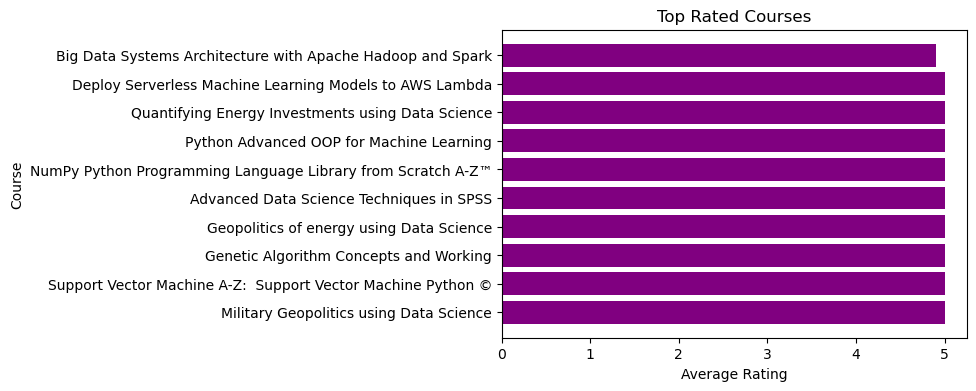

In [93]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.barh(top_rated_ds_courses['title'], top_rated_ds_courses['rating'], color='purple')
plt.title('Top Rated Courses')
plt.xlabel('Average Rating')
plt.ylabel('Course')
plt.show()


##### 4.1.6 Top Rated courses of top tutor based on rating: panads to group by tutor and title and calculate the mean rating, and create a bar chart to visualize the differences

Top rated courses of Top rated tutor -- selecting top course from top rated tutor(group by rating)

In [94]:
top_tutors = top_tutors_ds.index.tolist()

# To only get the rows with top rated tutors
top_tutors_df = data_science[data_science['tutor'].isin(top_tutors)]

# Grouping the top_tutors_df by tutor and course, and calculate the average rating for each course
top_rated_ds_courses = top_tutors_df.groupby(['tutor', 'title'])['rating'].mean().reset_index()

# Top-rated course for each tutor
top_title_ds_tutor = top_rated_ds_courses.sort_values('rating', ascending=False).groupby('tutor').first()[['title', 'rating']]


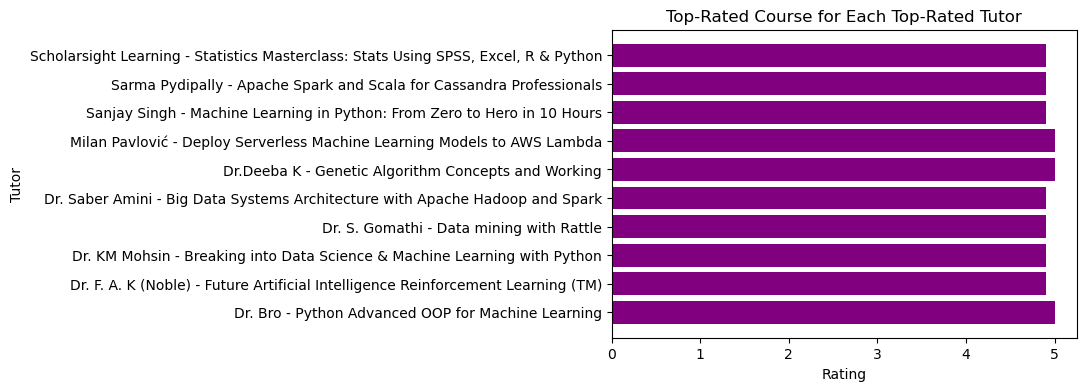

In [95]:
labels = [tutor + " - " + title for tutor, title in zip(top_title_ds_tutor.index, top_title_ds_tutor['title'])]
plt.barh(labels, top_title_ds_tutor['rating'], color='purple')
# Add a title and axis labels
plt.title('Top-Rated Course for Each Top-Rated Tutor')
plt.xlabel('Rating')
plt.ylabel('Tutor')

# Show the plot
plt.show()

##### 4.1.7 Top-rated tutors: pandas to group the courses by tutor and calculate the average rating for each tutor, and create a bar chart of the top-rated tutors

In [76]:
tutor_ratings_ds = round(data_science.groupby('tutor')['rating'].mean(),2)
top_tutors_ds = tutor_ratings_ds.sort_values(ascending=False)[:10]

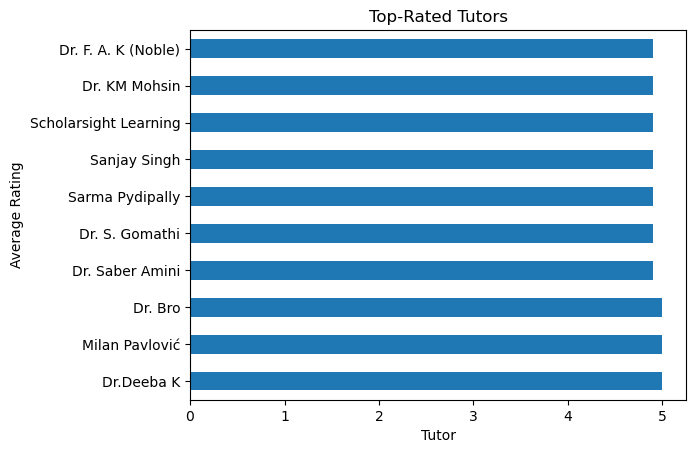

In [77]:
top_tutors_ds.plot(kind='barh')
plt.xlabel('Tutor')
plt.ylabel('Average Rating')
plt.title('Top-Rated Tutors')

plt.show()

##### 4.1.8 Top tutors by no.of reviews: Pandas to groupby tutor and get sum and mean of num_reviews, and chart to visualize

In [96]:
# Grouping the df by tutor and calculating the total and average num_reviews for each tutor
ds_tutor_stats = data_science.groupby('tutor').agg(
    {'num_reviews': ['sum', 'mean']})

In [97]:
# Sort the results by total num_reviews in descending order
ds_tutor_stats = ds_tutor_stats.sort_values(by=('num_reviews', 'sum'), ascending=False).head(10)
ds_tutor_stats

num_reviews              
                                                           sum          mean
tutor                                                                       
Jose Portilla                                           238113  17008.071429
Kirill Eremenko, Hadelin de Ponteves, Ligency I...      215518  53879.500000
365 Careers, 365 Careers Team                           157938  52646.000000
Kirill Eremenko, Ligency I Team, Ligency Team           126608  25321.600000
Lazy Programmer Inc.                                     68857   5296.692308
Sundog Education by Frank Kane, Frank Kane, Sun...       62803  15700.750000
Lazy Programmer Team, Lazy Programmer Inc.               37043   3086.916667
Hadelin de Ponteves, Kirill Eremenko, Ligency I...       22560  22560.000000
Andrei Neagoie, Daniel Bourke, Zero To Mastery           21449   7149.666667
Boris Paskhaver                                          18837  18837.000000

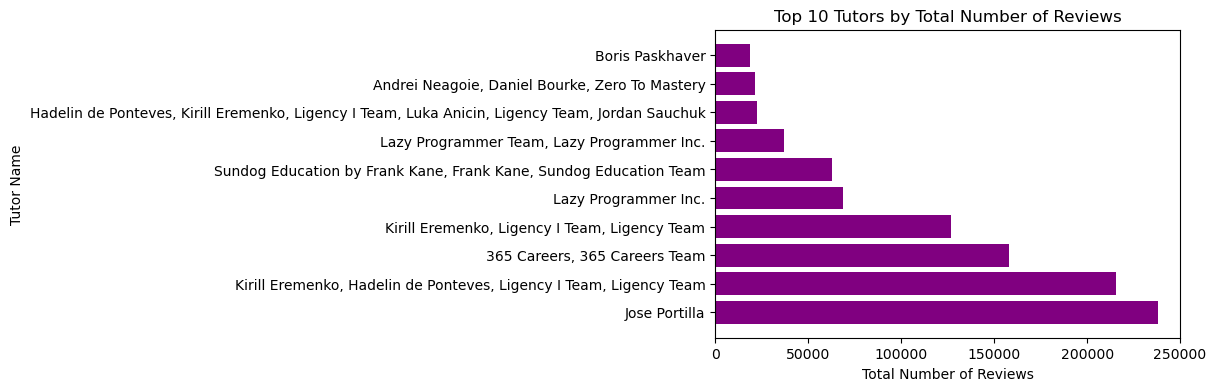

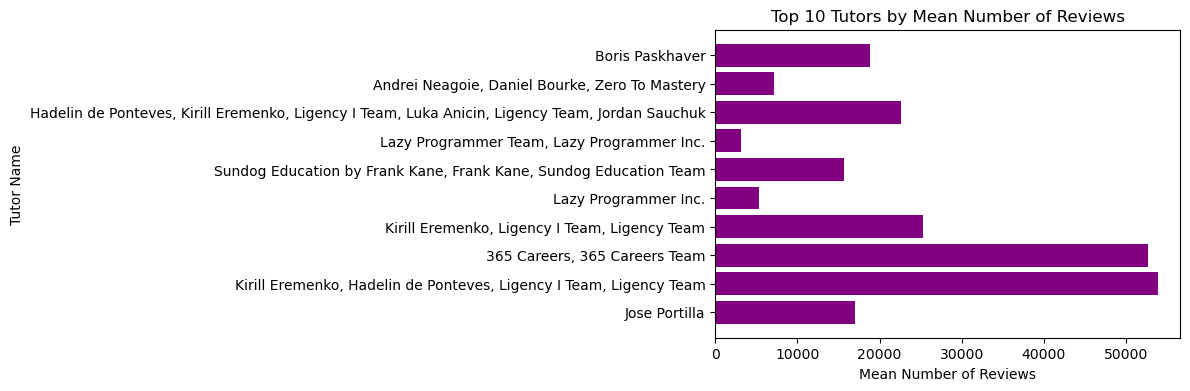

In [98]:
plt.barh(ds_tutor_stats.index, ds_tutor_stats[('num_reviews', 'sum')][:10], color='purple')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Tutor Name')
plt.title('Top 10 Tutors by Total Number of Reviews')
plt.show()
 
plt.barh(ds_tutor_stats.index, ds_tutor_stats[('num_reviews', 'mean')][:10], color='purple')
plt.xlabel('Mean Number of Reviews')
plt.ylabel('Tutor Name')
plt.title('Top 10 Tutors by Mean Number of Reviews')
plt.show()

### 4.2 Network And Security Analysis

In [16]:
network_security = pd.read_csv('net_security_cleaned.csv')

In [100]:
network_security.head()

,title,tutor,rating,num_reviews,hours,num_lecture,level
0,Learn Ethical Hacking From Scratch,"Zaid Sabih, z Security",4.6,112384,16.0,145,All Levels
1,Kubernetes for the Absolute Beginners - Hands-on,"Mumshad Mannambeth, KodeKloud Training",4.6,62456,6.0,61,Beginner
2,The Complete Cyber Security Course : Hackers E...,Nathan House,4.5,46726,12.0,124,All Levels
3,The Absolute Beginners Guide to Cyber Security...,Alexander Oni,4.6,32677,4.5,57,Beginner
4,The Complete Ethical Hacking Course: Beginner ...,"Ermin Kreponic, Aldin Omerdic",4.3,29204,25.0,113,All Levels


##### 4.2.1 Distribution of course ratings: pandas to calculate the mean and median rating and create a histogram of the course ratings

In [101]:
ns_mean_rating = round(network_security['rating'].mean(),2)
ns_median_rating = round(network_security['rating'].median(),2)
print(ns_mean_rating)
print(ns_median_rating)

4.23
4.3


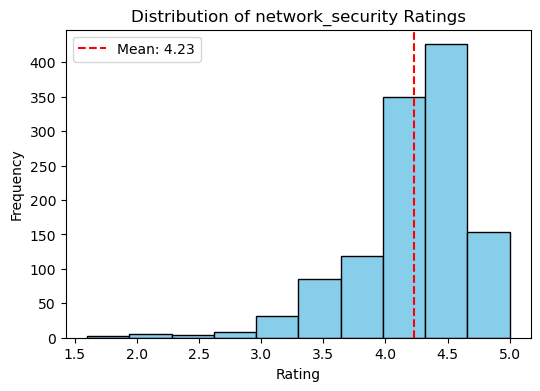

In [102]:
plt.hist(network_security['rating'], bins=10, color="skyblue", edgecolor="black")
plt.axvline(ns_mean_rating, color="red", linestyle="--", label=f"Mean: {ns_mean_rating:.2f}")
plt.title("Distribution of network_security Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

##### 4.2.2 Correlation between course rating and number of reviews: pandas to calculate the correlation between the course rating and the number of reviews, and if strong corr. scatter plot to visualize the relationship.

In [103]:
ns_rating_review_corr = round(network_security['rating'].corr(network_security['num_reviews']),2)
ns_rating_review_corr

0.1

0.1 shows very weak correlation so using scatter plot to Visualize the corr. won't make a difference

##### 4.2.3 Distribution of course levels: pandas to count the number of courses at each level and create a bar chart to visualize the distribution.

In [87]:
ns_level_counts = network_security.groupby('level')['title'].count()
ns_level_counts

level
All Levels      656
Beginner        323
Expert           23
Intermediate    182
Name: title, dtype: int64

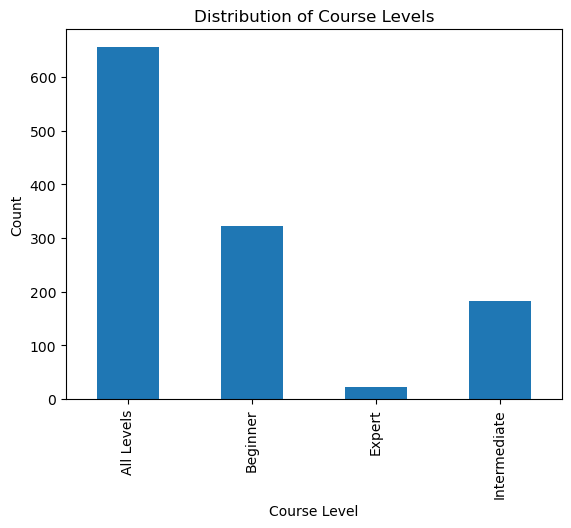

In [88]:
ns_level_counts.plot.bar()
plt.xlabel('Course Level')
plt.ylabel('Count')
plt.title('Distribution of Course Levels')
plt.show()

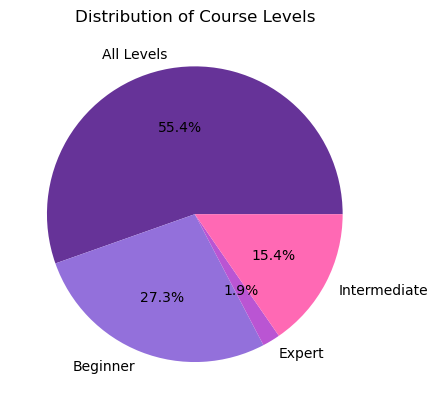

In [89]:
plt.pie(ns_level_counts, labels=ns_level_counts.index, autopct='%1.1f%%',colors = my_palette)
plt.title('Distribution of Course Levels')

plt.show()

##### 4.2.4 Average lecture hours by course level: pandas to group the courses by level and calculate the mean lecture hours for each level, and create a bar chart to visualize the differences.

In [108]:
ns_level_lecture_hours = round(network_security.groupby('level')['hours'].mean(),2)
ns_level_lecture_hours

level
All Levels       9.47
Beginner         7.85
Expert          10.50
Intermediate     6.63
Name: hours, dtype: float64

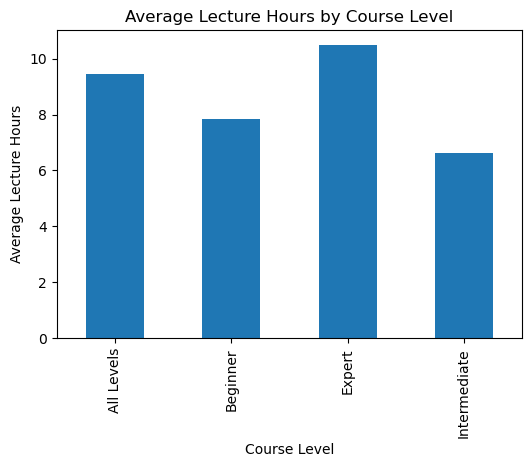

In [109]:
ns_level_lecture_hours.plot(kind='bar')
plt.xlabel('Course Level')
plt.ylabel('Average Lecture Hours')
plt.title('Average Lecture Hours by Course Level')

plt.show()

##### 4.2.5 Top Rated courses : panads to calculate the mean rating, and create a bar chart to visualize the differences.

In [110]:
# Group the rating by title and get avg 
ns_ratings = network_security.groupby('title')['rating'].mean()

# Sort course_ratings in descending order by Avg rating
sorted_ns_ratings = ns_ratings.sort_values(ascending=False)

# Select the top 10 courses with the highest mean rating
top_rated_ns_courses = sorted_ns_ratings.head(10).reset_index()

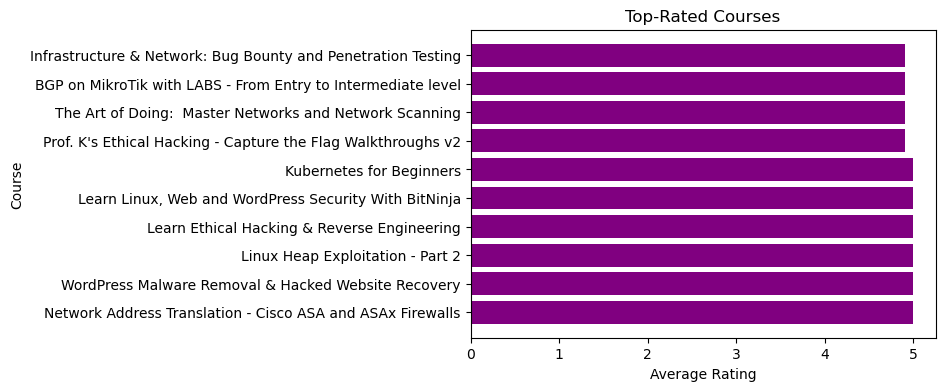

In [111]:
plt.barh(top_rated_ns_courses['title'], top_rated_ns_courses['rating'], color='purple')
plt.title('Top-Rated Courses')
plt.xlabel('Average Rating')
plt.ylabel('Course')
plt.show()

##### 4.2.6 Top Rated courses of top tutor based on rating: panads to group by tutor and title and calculate the mean rating, and create a bar chart to visualize the differences

In [115]:
top_tutors_ns = top_tutors_ns.index.tolist()

# To only get the rows with top rated tutors
top_tutors_df = network_security[network_security['tutor'].isin(top_tutors_ns)]

# Grouping the top_tutors_df by tutor and course, and calculate the average rating for each course
top_rated_ns_courses = top_tutors_df.groupby(['tutor', 'title'])['rating'].mean().reset_index()

# Top-rated course for each tutor
top_title_ns_tutor = top_rated_ns_courses.sort_values('rating', ascending=False).groupby('tutor').first()[['title', 'rating']]


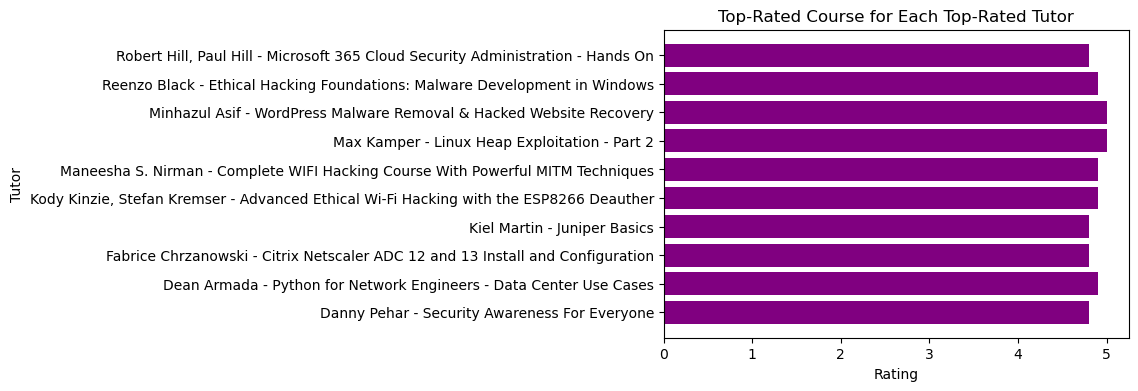

In [116]:
labels = [tutor + " - " + title for tutor, title in zip(top_title_ns_tutor.index, top_title_ns_tutor['title'])]
plt.barh(labels, top_title_ns_tutor['rating'], color='purple')
# Add a title and axis labels
plt.title('Top-Rated Course for Each Top-Rated Tutor')
plt.xlabel('Rating')
plt.ylabel('Tutor')

# Show the plot
plt.show()

##### 4.2.7 Top-rated tutors: pandas to group the courses by tutor and calculate the average rating for each tutor, and create a bar chart of the top-rated tutors

In [113]:
tutor_ratings_ns = round(network_security.groupby('tutor')['rating'].mean(),2)
top_tutors_ns = tutor_ratings_ns.sort_values(ascending=False)[:10]

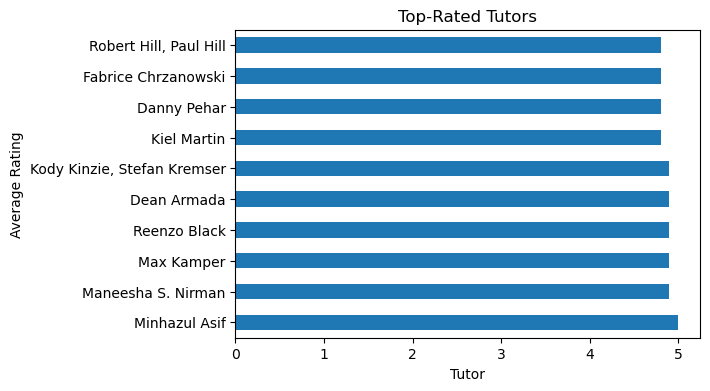

In [114]:
top_tutors_ns.plot(kind='barh')
plt.xlabel('Tutor')
plt.ylabel('Average Rating')
plt.title('Top-Rated Tutors')

plt.show()

##### 4.2.8 Top tutors by no.of reviews: Pandas to groupby tutor and get sum and mean of num_reviews, and chart to visualize

In [117]:
# Grouping the df by tutor and calculating the total and average num_reviews for each tutor
ns_tutor_stats = network_security.groupby('tutor').agg(
    {'num_reviews': ['sum', 'mean']})

In [118]:
# Sort the results by total num_reviews in descending order
ns_tutor_stats = ns_tutor_stats.sort_values(by=('num_reviews', 'sum'), ascending=False).head(10)
ns_tutor_stats

num_reviews              
                                                           sum          mean
tutor                                                                       
Zaid Sabih, z Security                                  151828  16869.777778
Mumshad Mannambeth, KodeKloud Training                   76254  25418.000000
Nathan House                                             75357  15071.400000
Alexander Oni                                            48331   6904.428571
Ermin Kreponic, Aldin Omerdic                            38276   9569.000000
Total Seminars • Over 1 Million Enrollments, Mi...       30130  15065.000000
Alton Hardin | 150,000+ Enrollments Worldwide, ...       25612   4268.666667
Amazon Web Services (AWS)                                25196  25196.000000
Zeal Vora                                                16056  16056.000000
Soerin Bipat                                             16006  16006.000000

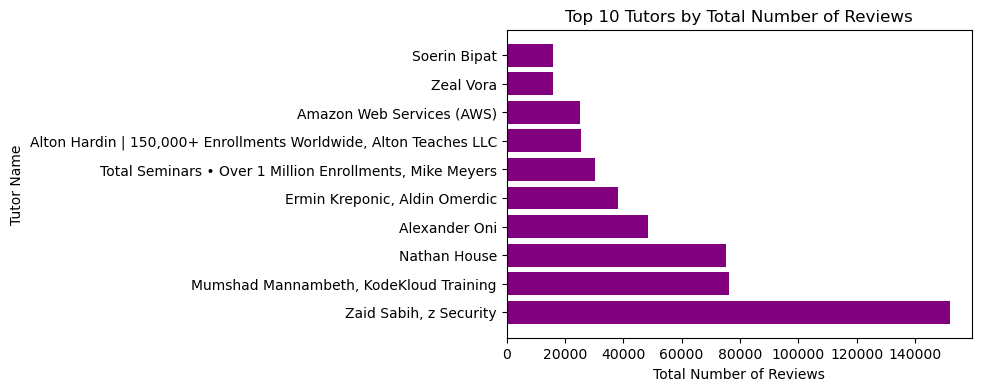

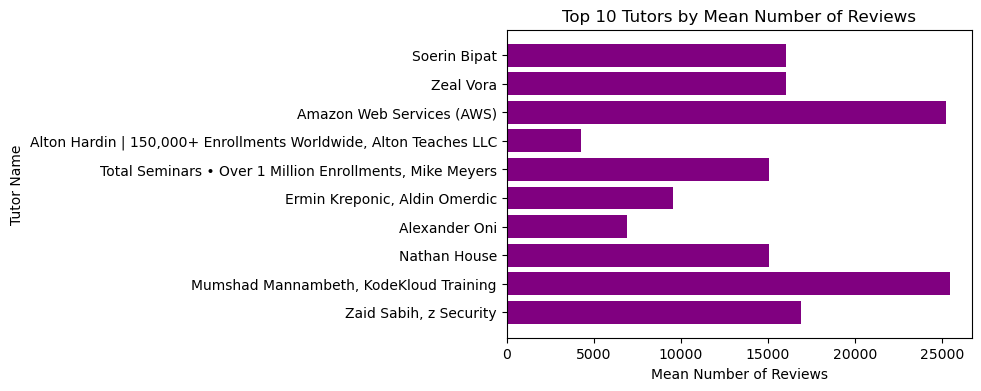

In [119]:
plt.barh(ns_tutor_stats.index, ns_tutor_stats[('num_reviews', 'sum')][:10], color='purple')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Tutor Name')
plt.title('Top 10 Tutors by Total Number of Reviews')
plt.show()
 
plt.barh(ns_tutor_stats.index, ns_tutor_stats[('num_reviews', 'mean')][:10], color='purple')
plt.xlabel('Mean Number of Reviews')
plt.ylabel('Tutor Name')
plt.title('Top 10 Tutors by Mean Number of Reviews')
plt.show()

# 5. Combined DataFrame Analysis

'Data science' and 'Network & security' combined by Common Tutors

In [17]:
common_tutors = list(set(data_science['tutor']).intersection(set(network_security['tutor'])))

In [18]:
# Create a new df with only rows where the tutor is a common tutor
common_tutors_df = pd.concat([data_science[data_science['tutor'].isin(common_tutors)],
                    network_security[network_security['tutor'].isin(common_tutors)]],
                   sort=False)[['title', 'tutor', 'rating', 'num_reviews', 'hours', 'num_lecture', 'level']]

# Adding a new column called "category" based on the original df to keep track of course's original category
common_tutors_df['category'] = ''

# Setting the category column based on whether the tutor is in ds_course_1 or in network_security
common_tutors_df.loc[common_tutors_df['title'].isin(data_science['title']), 'category'] = 'Data Science'
common_tutors_df.loc[common_tutors_df['title'].isin(network_security['title']), 'category'] = 'Network and Security'


In [20]:
common_tutors_df.reset_index(drop=True, inplace=True)

In [22]:
len(common_tutors_df)

203

### Analysis

##### 5.1 Average rating: Calculating the average rating for each tutor in both categories.

In [24]:
# Grouping tutor by rating to get avg rating of all tutors
avg_common_rating = common_tutors_df.groupby('tutor')['rating'].mean()
avg_common_rating.sort_values(ascending=False)

tutor
Scott Duffy  • 800.000+ Students, Software Architect.ca                        4.550000
Oak Academy, OAK Academy Team                                                  4.509091
Martin Yanev                                                                   4.450000
Mark Nielsen                                                                   4.350000
Stone River eLearning                                                          4.325000
Justin Mitchel                                                                 4.300000
Abhilash Nelson                                                                4.240000
Qasim Shah, Syed Raza                                                          4.200000
Mammoth Interactive, John Bura                                                 4.130000
Harshit Srivastava                                                             4.062500
TetraNoodle Team, Manuj Aggarwal                                               4.050000
Sefik Ilkin Serengil      

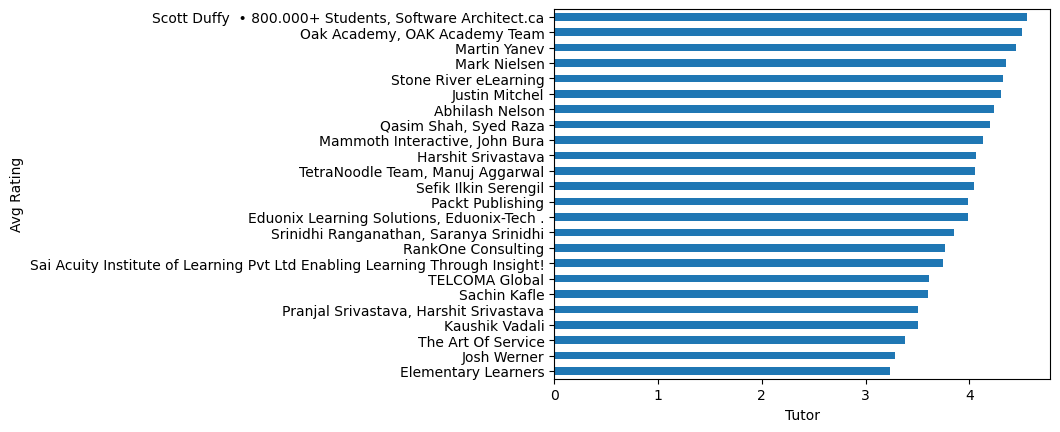

In [25]:
avg_common_rating.sort_values().plot(kind='barh')
plt.xlabel('Tutor')
plt.ylabel('Avg Rating')
plt.show()

##### 5.2 Number of reviews: number of reviews each tutor has received in both categories to determine which tutors are more popular

In [101]:
# Group by tutor and category and get the average rating
tutors_reviews = common_tutors_df.groupby(['tutor', 'category'])['rating'].mean().reset_index()

tutors_reviews = tutors_reviews.head(20)

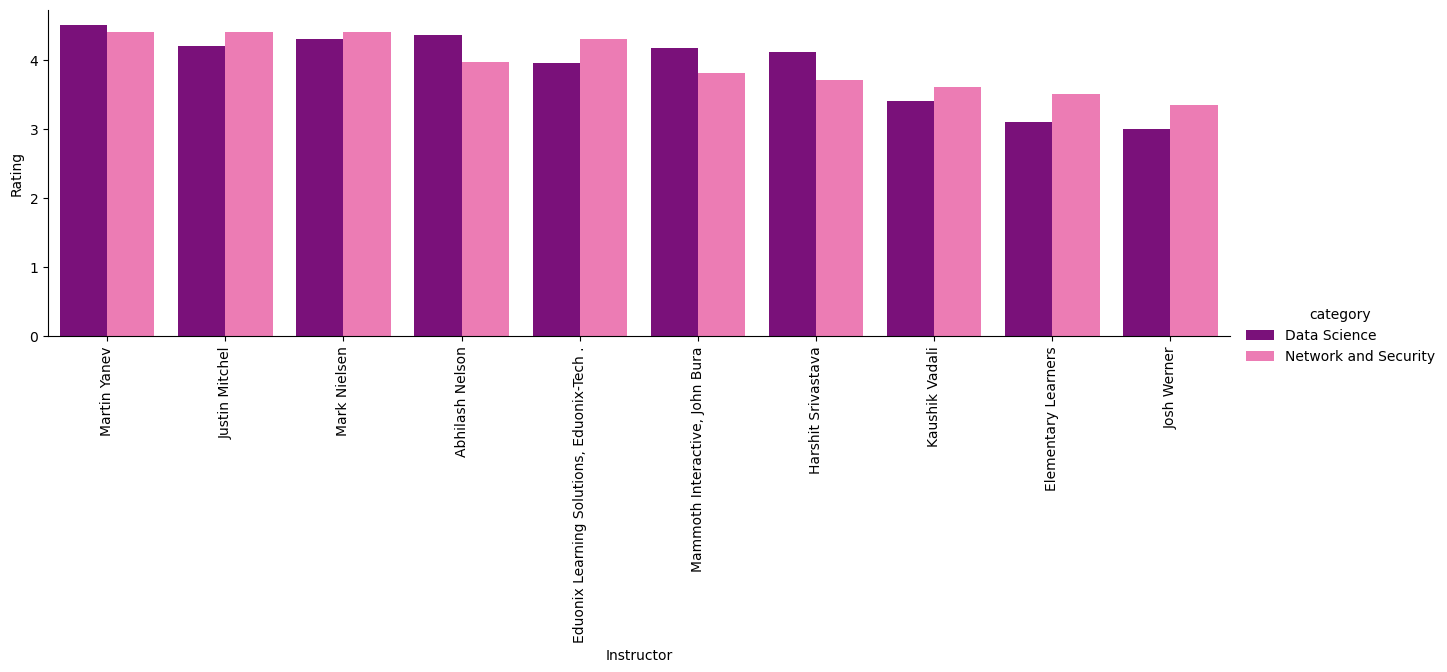

In [102]:
sns.catplot(x="tutor", y="rating", hue="category", data=tutors_reviews.sort_values(by='rating', ascending=False), kind="bar",height=4, aspect=26/8.27, palette=palette)
plt.xlabel('Instructor')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

##### 5.3 Hours of instruction:  number of hours for each tutor provides in both categories 

In [70]:
avg_hours = common_tutors_df.groupby(['tutor', 'category'])['hours'].mean().reset_index()
avg_hours = avg_hours.head(20)

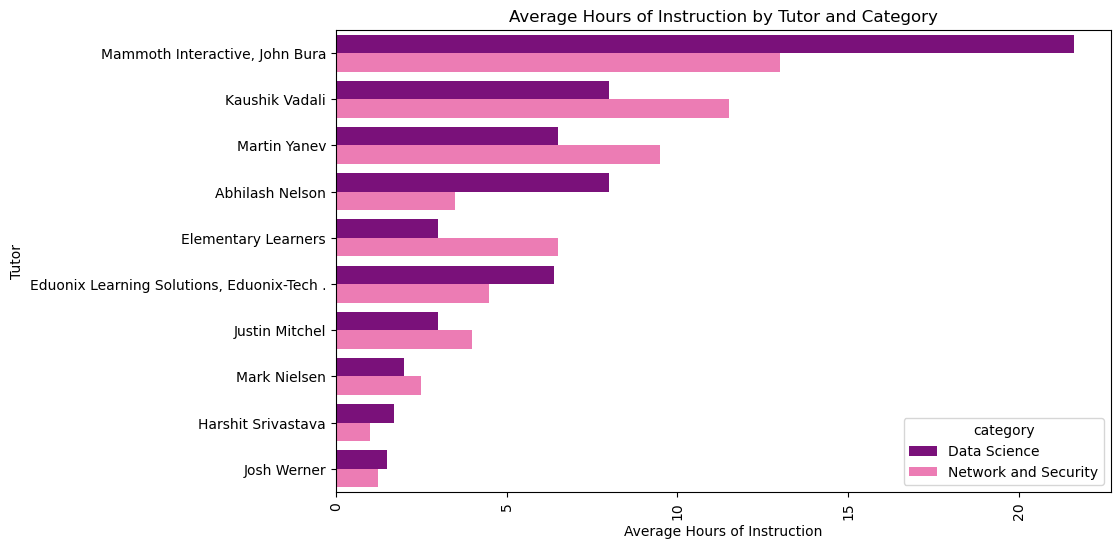

In [71]:
# Create a bar chart of the average hours of instruction for each tutor, category and level
plt.figure(figsize=(10, 6))
sns.barplot(x='hours', y='tutor', hue='category', ci=None, data=avg_hours.sort_values(by='hours',ascending=False),palette=palette)

plt.xlabel('Average Hours of Instruction')
plt.ylabel('Tutor')
plt.xticks(rotation=90)
plt.title('Average Hours of Instruction by Tutor and Category')
plt.show()

##### 5.4 Number of lectures: Analyzing the number of lectures each tutor has in both categories.

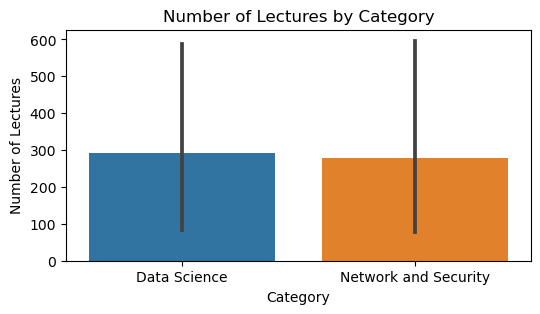

In [30]:
num_lectures_df = common_tutors_df.groupby(['tutor', 'category'])['num_lecture'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(6, 3))

sns.barplot(data=num_lectures_df, x='category', y='num_lecture')
plt.title('Number of Lectures by Category')
plt.xlabel('Category')
plt.ylabel('Number of Lectures')
plt.show()

##### 5.6 Level of course: Categorize the tutors by level of instruction (All levels, beginner, intermediate, advanced) in both categories.

In [105]:
## reset_index(name='count') so it will allow us to add category column in the df
level_tutor = common_tutors_df.groupby(['tutor', 'level','category'])['category'].count().reset_index(name='count')
top_level_tutor = level_tutor.sort_values(by='count',ascending=False)
top_level_tutor

,tutor,level,category,count
27,Packt Publishing,Beginner,Data Science,24
31,Packt Publishing,Intermediate,Data Science,19
55,Stone River eLearning,All Levels,Network and Security,15
28,Packt Publishing,Beginner,Network and Security,13
24,"Oak Academy, OAK Academy Team",All Levels,Data Science,9
...,...,...,...,...
34,"Pranjal Srivastava, Harshit Srivastava",All Levels,Network and Security,1
35,"Qasim Shah, Syed Raza",All Levels,Network and Security,1
37,RankOne Consulting,All Levels,Data Science,1
38,RankOne Consulting,All Levels,Network and Security,1


In [65]:
palette = ['#8B008B', '#FF69B4', '#BA55D3']

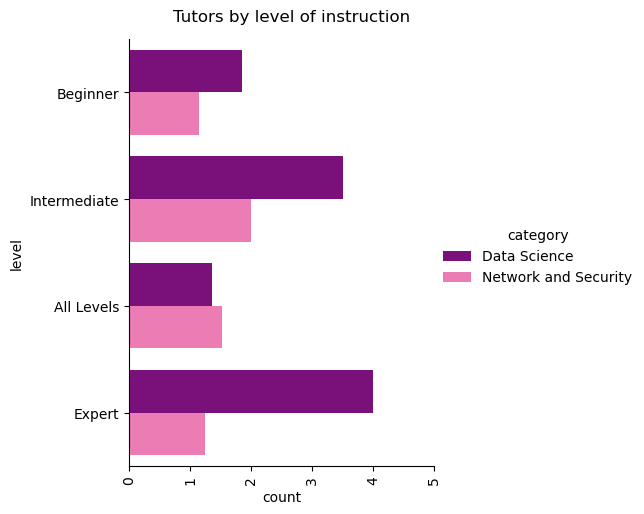

In [104]:
# create the bar chart using seaborn, col_wrap=2 will combine 2 different graph of category into 1
g = sns.catplot(x ='count', y ='level', hue ='category', data = top_level_tutor,ci = None, kind ='bar',palette=palette)

g.set_xticklabels(rotation=90)
g.fig.suptitle('Tutors by level of instruction', y=1.03)
g.set_axis_labels('count','level')

# show the plot
plt.show()

##### 5.7 Top-rated tutors: Identify the top-rated tutors based on their rating and number of reviews in both categories 

In [33]:
# Group the data by tutor and category
#top_tutors = c_t_df.groupby(['category']).agg({'rating':'mean','num_reviews':'mean'})
#op_tutors = top_tutors.sort_values(by=["category", "rating", "reviews"], ascending=[True, False, False])

top_tutors = common_tutors_df.groupby(['tutor', "category"]).apply(lambda x: x.sort_values(["rating", "num_reviews"], ascending=[False, False]))
top_tutors = top_tutors.droplevel(0).head(100)

In [43]:
my_palette = ['#FFB6C1', '#FF69B4', '#BA55D3', '#9370DB', '#663399']

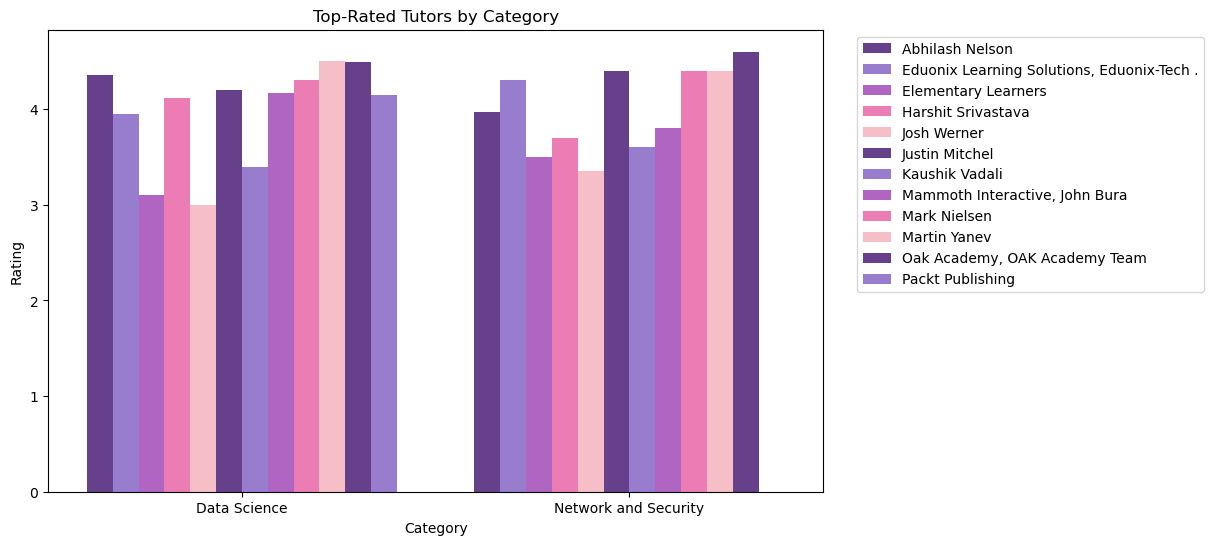

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tutors['category'], y="rating",ci=None, hue="tutor", data=top_tutors,palette =my_palette)
plt.title("Top-Rated Tutors by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.5, 1),loc="upper right")
plt.show()

##### 5.8 Category comparison: Comparing the average of all th numerical column grouping by category to identify which category has stronger instructors overall

In [58]:
avg_all_unstack = common_tutors_df.groupby('category').mean().unstack()
avg_all_unstack

             category            
rating       Data Science              3.993913
             Network and Security      4.013636
num_reviews  Data Science            153.956522
             Network and Security    321.965909
hours        Data Science              7.934783
             Network and Security      6.857955
num_lecture  Data Science             61.226087
             Network and Security     75.863636
dtype: float64

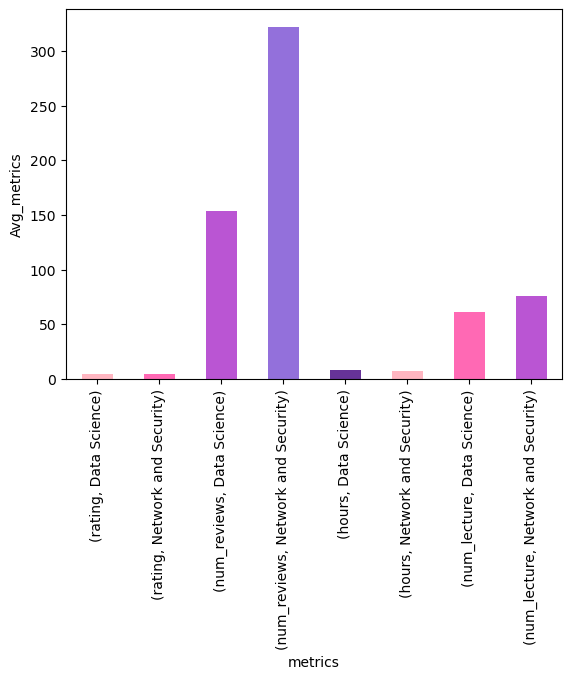

In [59]:
avg_all_unstack.plot.bar(color=my_palette)
plt.xlabel('metrics')
plt.ylabel('Avg_metrics')
plt.show()

In [60]:
avg_all = common_tutors_df.groupby('category').mean()
avg_all

,rating,num_reviews,hours,num_lecture
category,,,,
Data Science,3.993913,153.956522,7.934783,61.226087
Network and Security,4.013636,321.965909,6.857955,75.863636


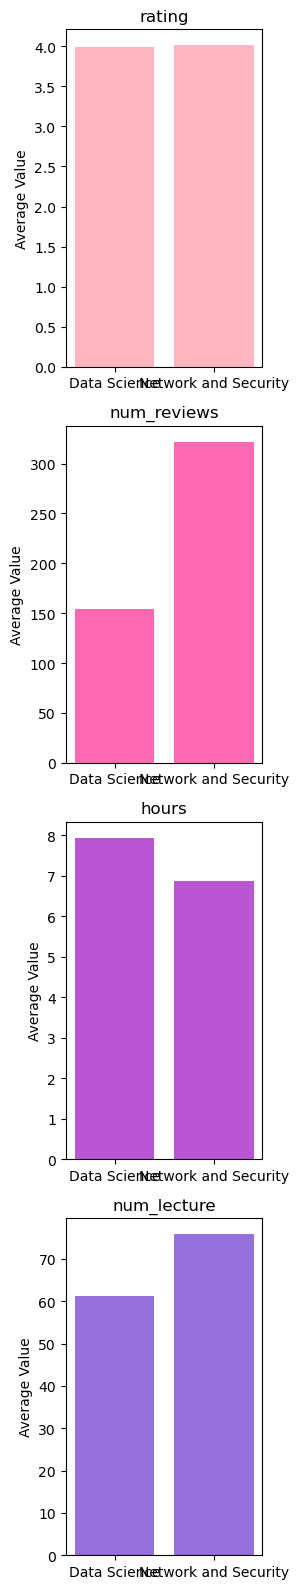

In [61]:
## Plotting using for loop as num_reviews bar is very high compared to other elements which only gives bar or plot num_reviews:
fig, axs = plt.subplots(nrows=len(avg_all.columns), figsize=(3, 4*len(avg_all.columns)))
for e, col in enumerate(avg_all.columns):
    axs[e].bar(avg_all.index, avg_all[col],color=my_palette[e])
    axs[e].set_title(col)
    axs[e].set_ylabel('Average Value')
plt.tight_layout()
plt.show()